<a href="https://colab.research.google.com/github/Cagribilgehan/ChatCPT_otantik_ve_sus/blob/main/Otantik_gorev_ve_sus_skorlari_analizleri.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

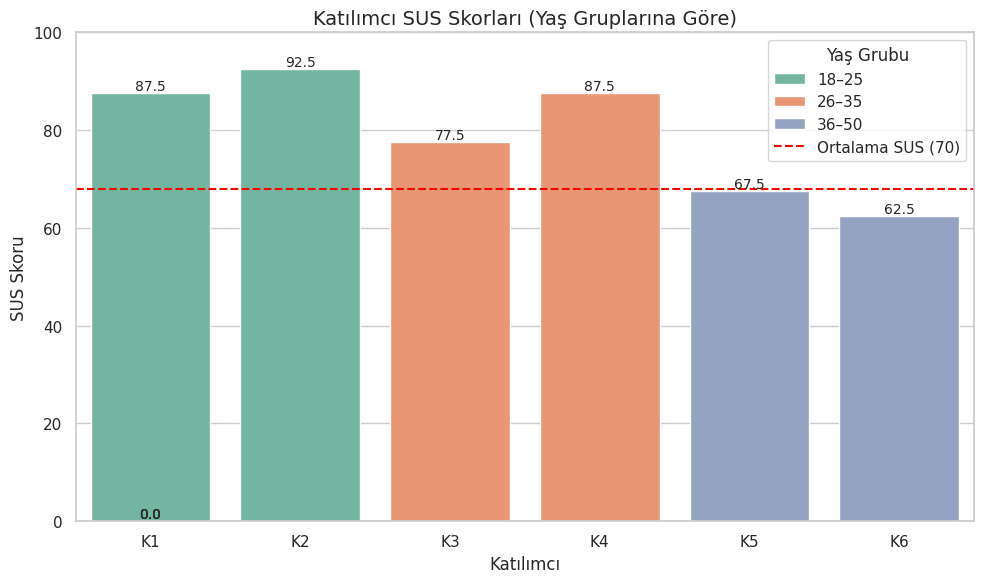

Ortalama SUS Skoru: 79.17


In [13]:
# Gerekli kütüphaneleri yükle
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# SUS skorları ve katılımcı bilgileri
data = {
    'Katılımcı': ['K1', 'K2', 'K3', 'K4', 'K5', 'K6'],
    'SUS Skoru': [87.5, 92.5, 77.5, 87.5, 67.5, 62.5],
    'Yaş Grubu': ['18–25', '18–25', '26–35', '26–35', '36–50', '36–50']
}
df = pd.DataFrame(data)

# Seaborn teması ayarla (Matplotlib stili yerine)
sns.set_theme(style="whitegrid")  # Modern ve temiz bir tema

# Renk paleti
sns.set_palette("Set2")

# 1. Bar Grafiği
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Katılımcı', y='SUS Skoru', hue='Yaş Grubu', dodge=False, data=df)
plt.axhline(68, color='red', linestyle='--', label='Ortalama SUS (70)')  # Ortalama SUS çizgisi
plt.title('Katılımcı SUS Skorları (Yaş Gruplarına Göre)', fontsize=14)
plt.xlabel('Katılımcı', fontsize=12)
plt.ylabel('SUS Skoru', fontsize=12)
plt.ylim(0, 100)  # 0-100 ölçeği
plt.legend(title='Yaş Grubu')

# Barların üzerine skorları yaz
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Ortalama SUS skoru
print(f"Ortalama SUS Skoru: {df['SUS Skoru'].mean():.2f}")

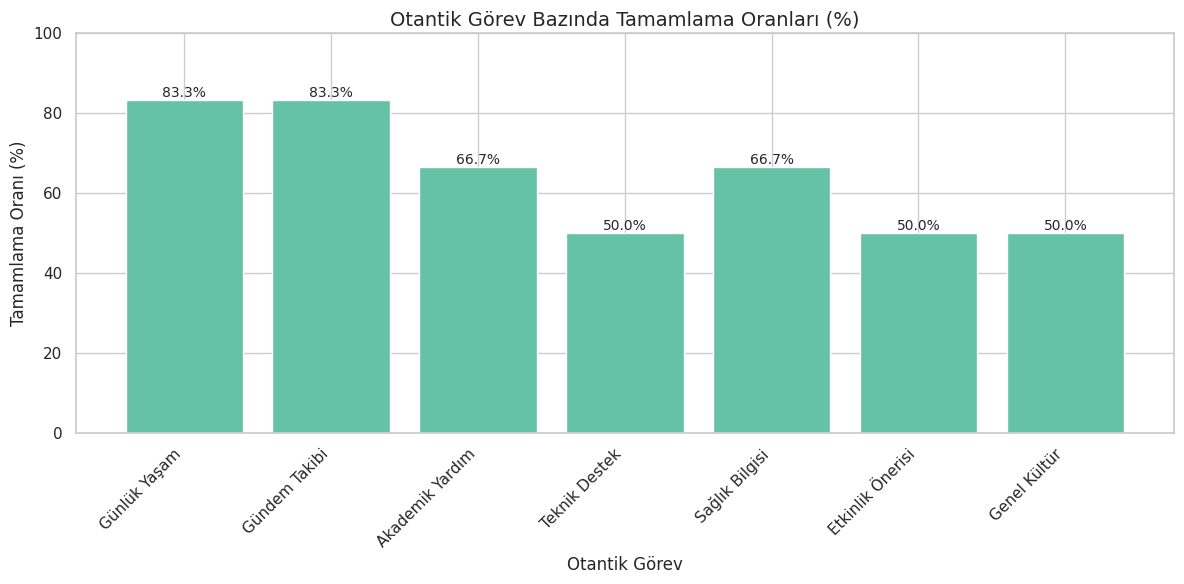

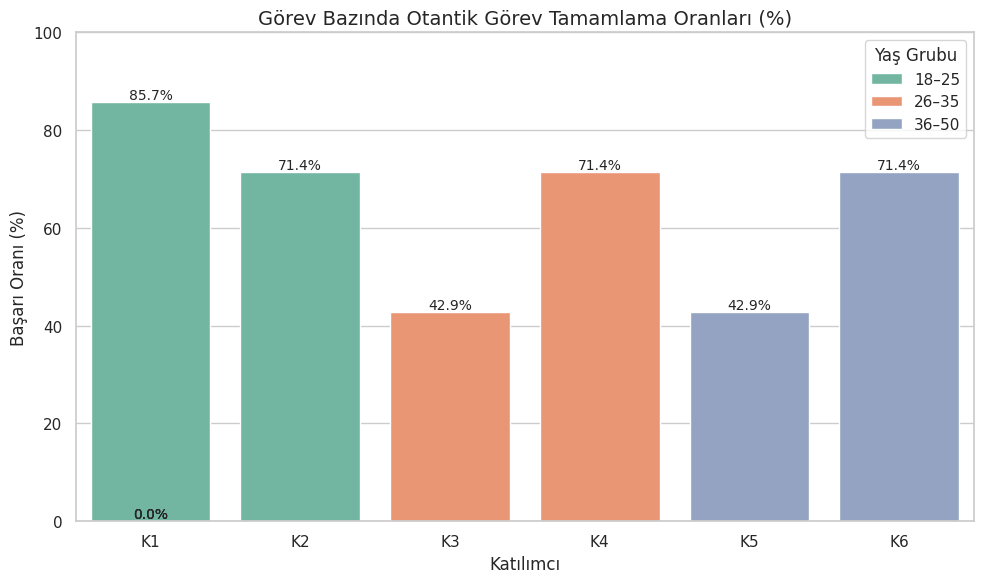

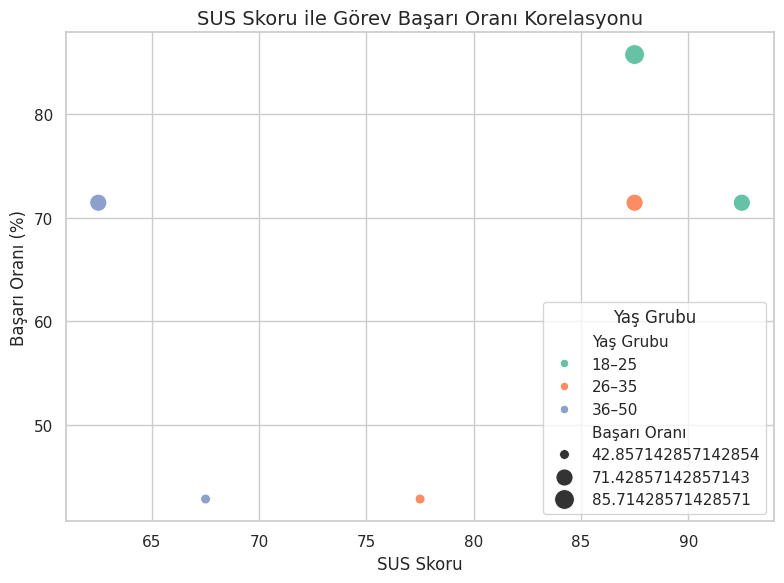

SUS Skoru ile Başarı Oranı Arasındaki Korelasyon: 0.47 (p-değeri: 0.345)


In [14]:
import scipy.stats as stats

# Veri seti
data = {
    'Katılımcı': ['K1', 'K2', 'K3', 'K4', 'K5', 'K6'],
    'Yaş Grubu': ['18–25', '18–25', '26–35', '26–35', '36–50', '36–50'],
    'SUS Skoru': [87.5, 92.5, 77.5, 87.5, 67.5, 62.5],
    'Günlük Yaşam': [1, 1, 1, 1, 0, 1],  # 1: Başarılı, 0: Başarısız
    'Gündem Takibi': [1, 1, 1, 1, 0, 1],
    'Akademik Yardım': [1, 1, 0, 1, 1, 0],
    'Teknik Destek': [1, 0, 0, 1, 1, 0],
    'Sağlık Bilgisi': [1, 1, 0, 1, 0, 1],
    'Etkinlik Önerisi': [1, 0, 1, 0, 0, 1],
    'Genel Kültür': [0, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# Seaborn teması
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")

# Bar Grafiği: Otantik Görev Tamamlama Oranları
completion_rates = df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                       'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                       'Genel Kültür']].mean() * 100
plt.figure(figsize=(12, 6))
bars = plt.bar(completion_rates.index, completion_rates.values)
plt.title('Otantik Görev Bazında Tamamlama Oranları (%)', fontsize=14)
plt.xlabel('Otantik Görev', fontsize=12)
plt.ylabel('Tamamlama Oranı (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)

# Barların üzerine yüzdeleri yaz
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():.1f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Bar Grafiği: Katılımcı Bazında Başarı Oranı
df['Başarı Oranı'] = df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                         'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                         'Genel Kültür']].mean(axis=1) * 100
plt.figure(figsize=(10, 6))
bars = sns.barplot(x='Katılımcı', y='Başarı Oranı', hue='Yaş Grubu', dodge=False, data=df)
plt.title('Görev Bazında Otantik Görev Tamamlama Oranları (%)', fontsize=14)
plt.xlabel('Katılımcı', fontsize=12)
plt.ylabel('Başarı Oranı (%)', fontsize=12)
plt.ylim(0, 100)
plt.legend(title='Yaş Grubu')

# Barların üzerine yüzdeleri yaz
for bar in bars.patches:
    bars.annotate(f'{bar.get_height():.1f}%',
                  (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                  ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


# Korelasyon: SUS Skoru ile Başarı Oranı
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SUS Skoru', y='Başarı Oranı', hue='Yaş Grubu', size='Başarı Oranı',
                sizes=(50, 200), data=df)
plt.title('SUS Skoru ile Görev Başarı Oranı Korelasyonu', fontsize=14)
plt.xlabel('SUS Skoru', fontsize=12)
plt.ylabel('Başarı Oranı (%)', fontsize=12)
plt.legend(title='Yaş Grubu')
plt.tight_layout()
plt.show()

# Pearson korelasyon katsayısı
corr, p_value = stats.pearsonr(df['SUS Skoru'], df['Başarı Oranı'])
print(f"SUS Skoru ile Başarı Oranı Arasındaki Korelasyon: {corr:.2f} (p-değeri: {p_value:.3f})")

In [15]:
from scipy.stats import kruskal

# Veri seti: SUS skorları ve otantik görevler
data = {
    'Katılımcı': ['K1', 'K2', 'K3', 'K4', 'K5', 'K6'],
    'Yaş Grubu': ['18–25', '18–25', '26–35', '26–35', '36–50', '36–50'],
    'SUS Skoru': [87.5, 92.5, 77.5, 87.5, 67.5, 62.5],
    'Günlük Yaşam': [1, 1, 1, 1, 0, 1],  # 1: Başarılı, 0: Başarısız
    'Gündem Takibi': [1, 1, 1, 1, 0, 1],
    'Akademik Yardım': [1, 1, 0, 1, 1, 0],
    'Teknik Destek': [1, 0, 0, 1, 1, 0],
    'Sağlık Bilgisi': [1, 1, 0, 1, 0, 1],
    'Etkinlik Önerisi': [1, 0, 1, 0, 0, 1],
    'Genel Kültür': [0, 1, 0, 0, 1, 1]
}
df = pd.DataFrame(data)

# 1. Katılımcı Bazında Başarı Oranları
df['Başarı Oranı (%)'] = df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                             'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                             'Genel Kültür']].mean(axis=1) * 100
print("Katılımcı Bazında Başarı Oranları (%):")
print(df[['Katılımcı', 'Başarı Oranı (%)']])

# 2. Yaş Gruplarına Göre Otantik Başarı Oranları İstatistiksel Ölçüler
age_group_stats = df.groupby('Yaş Grubu')['Başarı Oranı (%)'].agg(['mean', 'std', 'median', 'min', 'max'])
age_group_stats['Ortalama ± SS'] = age_group_stats.apply(lambda x: f"{x['mean']:.2f} ± {x['std']:.2f}", axis=1)
print("\nYaş Gruplarına Göre Otantik Başarı Oranları İstatistiksel Ölçüler:")
print(age_group_stats[['Ortalama ± SS', 'median', 'min', 'max']])

# 3. Görev Tamamlama Oranları İstatistiksel Ölçüler
completion_rates = df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                       'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                       'Genel Kültür']].mean() * 100
completion_stats = pd.DataFrame({
    'Ortalama (%)': completion_rates,
    'Standart Sapma (%)': df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                              'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                              'Genel Kültür']].std() * 100,
    'Medyan (%)': df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                      'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                      'Genel Kültür']].median() * 100,
    'Min (%)': df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                   'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                   'Genel Kültür']].min() * 100,
    'Max (%)': df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                   'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                   'Genel Kültür']].max() * 100
})
print("\nGörev Tamamlama Oranları İstatistiksel Ölçüler:")
print(completion_stats)

# 4. Kruskal-Wallis Testi: Yaş grupları arasında SUS skoru farkı
sus_18_25 = df[df['Yaş Grubu'] == '18–25']['SUS Skoru']
sus_26_35 = df[df['Yaş Grubu'] == '26–35']['SUS Skoru']
sus_36_50 = df[df['Yaş Grubu'] == '36–50']['SUS Skoru']
stat, p = kruskal(sus_18_25, sus_26_35, sus_36_50)
print(f"\nKruskal-Wallis Testi (SUS Skorları): H={stat:.2f}, p={p:.3f}")

# 5. Yaş Gruplarına Göre SUS Skoru İstatistiksel Ölçüler (4.5)
sus_age_stats = df.groupby('Yaş Grubu')['SUS Skoru'].agg(['mean', 'std', 'median', 'min', 'max'])
sus_age_stats['Ortalama ± SS'] = sus_age_stats.apply(lambda x: f"{x['mean']:.2f} ± {x['std']:.2f}", axis=1)
print("\nYaş Gruplarına Göre SUS Skoru İstatistiksel Ölçüler:")
print(sus_age_stats[['Ortalama ± SS', 'median', 'min', 'max']])

# 6. Yaş Gruplarına Göre Başarı Oranları İstatistiksel Ölçüler (4.4)
age_group_stats = df.groupby('Yaş Grubu')['Başarı Oranı (%)'].agg(['mean', 'std', 'median', 'min', 'max'])
age_group_stats['Ortalama ± SS'] = age_group_stats.apply(lambda x: f"{x['mean']:.2f} ± {x['std']:.2f}", axis=1)
print("\nYaş Gruplarına Göre Başarı Oranları İstatistiksel Ölçüler:")
print(age_group_stats[['Ortalama ± SS', 'median', 'min', 'max']])

Katılımcı Bazında Başarı Oranları (%):
  Katılımcı  Başarı Oranı (%)
0        K1         85.714286
1        K2         71.428571
2        K3         42.857143
3        K4         71.428571
4        K5         42.857143
5        K6         71.428571

Yaş Gruplarına Göre Otantik Başarı Oranları İstatistiksel Ölçüler:
           Ortalama ± SS     median        min        max
Yaş Grubu                                                
18–25      78.57 ± 10.10  78.571429  71.428571  85.714286
26–35      57.14 ± 20.20  57.142857  42.857143  71.428571
36–50      57.14 ± 20.20  57.142857  42.857143  71.428571

Görev Tamamlama Oranları İstatistiksel Ölçüler:
                  Ortalama (%)  Standart Sapma (%)  Medyan (%)  Min (%)  \
Günlük Yaşam         83.333333           40.824829       100.0        0   
Gündem Takibi        83.333333           40.824829       100.0        0   
Akademik Yardım      66.666667           51.639778       100.0        0   
Teknik Destek        50.000000           54.

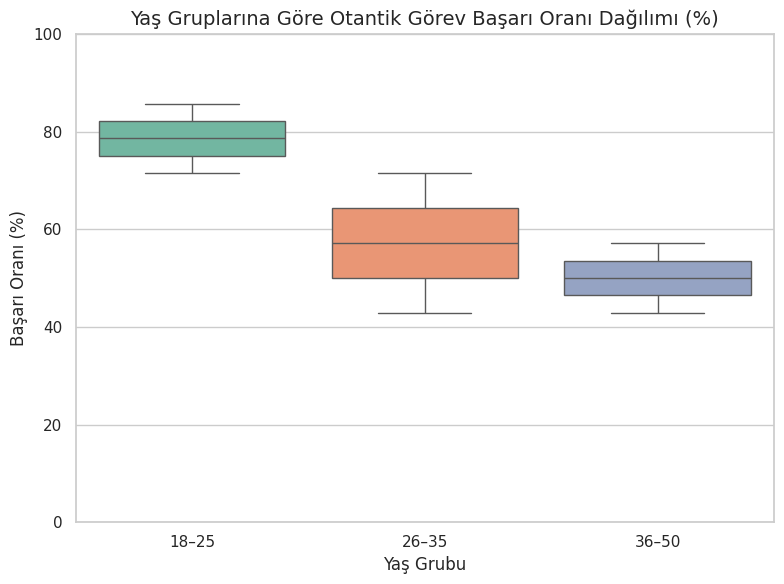

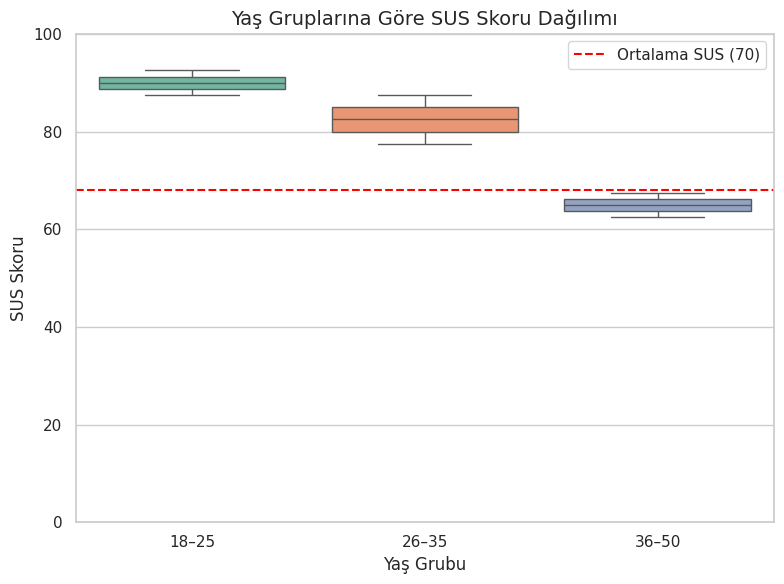

In [16]:
# Gerekli kütüphaneleri yükle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri seti
data = {
    'Katılımcı': ['K1', 'K2', 'K3', 'K4', 'K5', 'K6'],
    'Yaş Grubu': ['18–25', '18–25', '26–35', '26–35', '36–50', '36–50'],
    'SUS Skoru': [87.5, 92.5, 77.5, 87.5, 67.5, 62.5],
    'Günlük Yaşam': [1, 1, 1, 1, 0, 1],
    'Gündem Takibi': [1, 1, 1, 1, 0, 1],
    'Akademik Yardım': [1, 1, 0, 1, 1, 0],
    'Teknik Destek': [1, 0, 0, 1, 1, 0],
    'Sağlık Bilgisi': [1, 1, 0, 1, 0, 1],
    'Etkinlik Önerisi': [1, 0, 1, 0, 0, 1],
    'Genel Kültür': [0, 1, 0, 0, 1, 0]
}
df = pd.DataFrame(data)

# Katılımcı bazında başarı oranlarını hesapla
df['Başarı Oranı (%)'] = df[['Günlük Yaşam', 'Gündem Takibi', 'Akademik Yardım',
                             'Teknik Destek', 'Sağlık Bilgisi', 'Etkinlik Önerisi',
                             'Genel Kültür']].mean(axis=1) * 100

# Şekil 5: Yaş Gruplarına Göre Otantik Görev Başarı Oranı Dağılımı
plt.figure(figsize=(8, 6))
sns.boxplot(x='Yaş Grubu', y='Başarı Oranı (%)', hue='Yaş Grubu', data=df, palette='Set2', legend=False)
plt.title('Yaş Gruplarına Göre Otantik Görev Başarı Oranı Dağılımı (%)', fontsize=14)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('Başarı Oranı (%)', fontsize=12)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

# Şekil 6: Yaş Gruplarına Göre SUS Skoru Dağılımı
plt.figure(figsize=(8, 6))
sns.boxplot(x='Yaş Grubu', y='SUS Skoru', hue='Yaş Grubu', data=df, palette='Set2', legend=False)
plt.axhline(68, color='red', linestyle='--', label='Ortalama SUS (70)')
plt.title('Yaş Gruplarına Göre SUS Skoru Dağılımı', fontsize=14)
plt.xlabel('Yaş Grubu', fontsize=12)
plt.ylabel('SUS Skoru', fontsize=12)
plt.ylim(0, 100)
plt.legend()
plt.tight_layout()
plt.show()